Author: Thibeau Wouters

# Physical Modelling of Complex Systems - Assignment 7

##### Import packages

The following code block needs the file "basic_units.py", which is used to plot ticks in multiples or fractions of $\pi$. The file can be downloaded here: https://matplotlib.org/stable/gallery/units/basic_units.html.

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time

from basic_units import radians # separate file! To plot pi ticks

In [2]:
plt.style.use('ggplot')
plt.rcParams.update(
    {"text.usetex": True,
     'font.serif': 'Modern Roman',
     "figure.figsize": (8, 4),
    "axes.titlesize" : 26,
    "axes.labelsize" : 28,
    "lines.linewidth": 3,
     "legend.fontsize":24,
    "lines.markersize" : 10,
     "legend.fontsize": 16,
    "xtick.labelsize" : 24,
    "ytick.labelsize" : 24})

## 7.2 - Triangle wave in firefly model

### 7.2.1 - Plot of $f(\phi)$

In [3]:
def indicator(x, a, b):
    '''Returns 1 if x is between a and b, zero otherwise'''
    if x >= a and x <= b:
        return 1
    else:
        return 0

In [4]:
def triangle_wave(phi):
    '''Triangle wave between -pi/2 and 3pi/2'''
    
    return indicator(phi, -np.pi/2, np.pi/2)*(phi) + indicator(phi, np.pi/2, 3*np.pi/2)*(np.pi - phi) 

In [5]:
def general_triangle_wave(phi):
    '''Defined on the whole real line. Add/subtract the period until it is in the correct interval.'''
    
    # If phi is 'to the right' of the domain of the traingle wave, subtract a period
    while phi > 3*np.pi/2:
        phi = phi - 2*np.pi
    
    # If phi is 'to the left' of the domain of the traingle wave, add a period
    while phi < -np.pi/2:
        phi = phi + 2*np.pi
    
    # Now phi is in the domain of the triangle wave
    return triangle_wave(phi)

The following command block plots the function in the interval $\left[-\frac{\pi}{2}, \frac{3\pi}{2}\right]$.

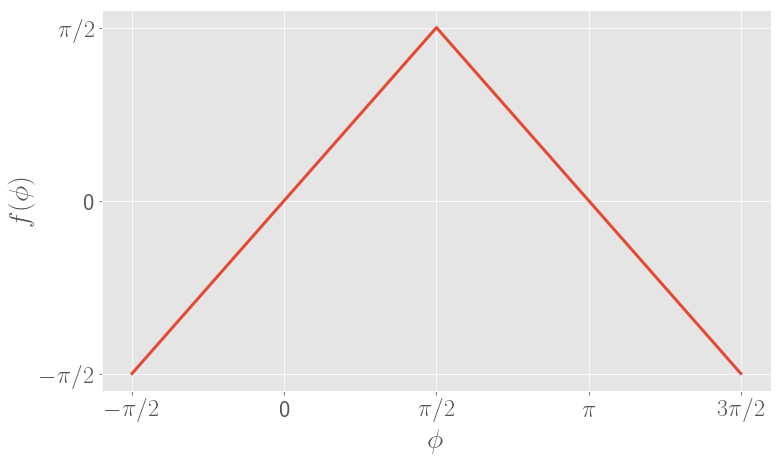

In [6]:
fig, ax = plt.subplots(1, figsize = (12, 7))

# Get x and y values for the plot
phi_vals = np.array(np.arange(-np.pi/2, 3*np.pi/2, 0.001))
y_vals = []

for phi in phi_vals: # for loop, because of boolean in piecewise function
    y_vals.append(triangle_wave(phi))


# This allows us to plot ticks in terms of fractions of pi    
y_vals2 = [val*radians for val in y_vals]
phi_vals2 = [val*radians for val in phi_vals]

# Plot
ax.plot(phi_vals2, y_vals2, xunits = radians, yunits = radians)

# Make fancy, save and show
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$f(\phi)$')
plt.show()

In the following, we can plot the function between any two given bounds $a$ and $b$. Here, we took $a$ and $b$ such that there are three periods of the triangle wave plotted.

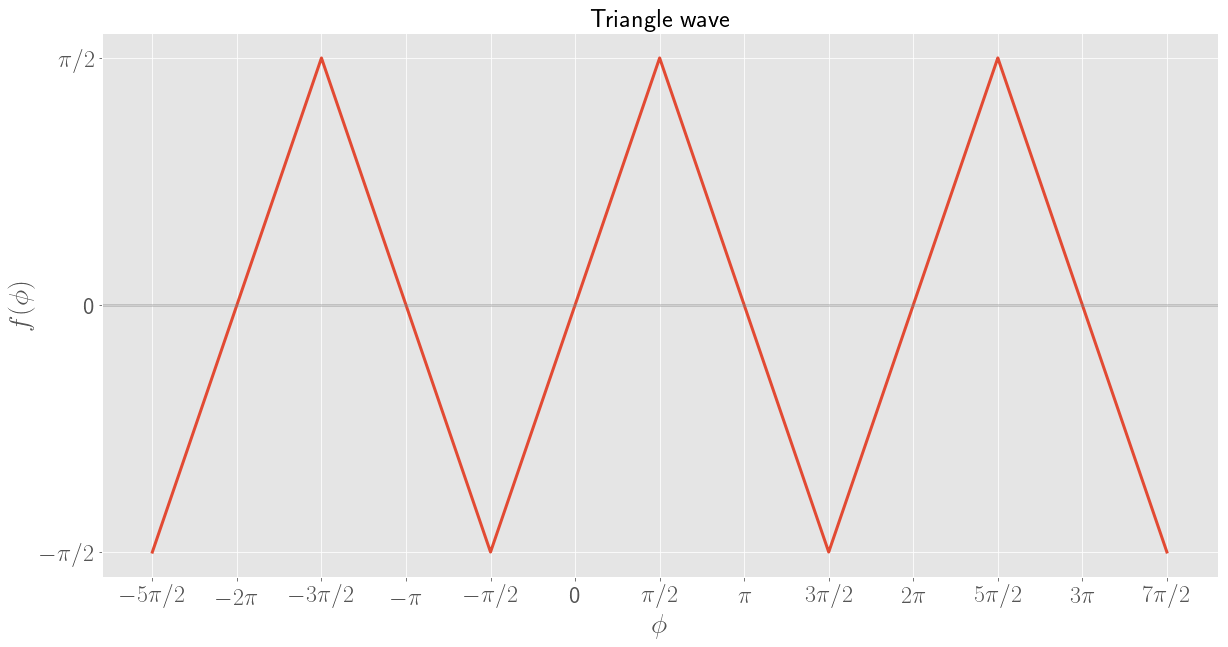

In [7]:
fig, ax = plt.subplots(1, figsize = (20, 10))

a = -5*np.pi/2; b = 7*np.pi/2

# Get x and y values for the plot
phi_vals = np.arange(a, b, 0.001)
y_vals = []

for phi in phi_vals:
    y_vals.append(general_triangle_wave(phi))

# This allows us to plot ticks in terms of fractions of pi    
y_vals2 = [val*radians for val in y_vals]
phi_vals2 = [val*radians for val in phi_vals]

# Plot
ax.plot(phi_vals2, y_vals2, xunits = radians, yunits = radians)

# Make fancy, save and show
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$f(\phi)$')
ax.axhline(y=0, color = 'grey', alpha = 0.35)
plt.title('Triangle wave')
plt.savefig('triangle_wave.pdf', bbox_inches = 'tight')
plt.show()

### 7.2.2 - Range of entrainment

We derived the equation $$ \phi'= \mu - f(\phi) \, . $$

Define the right hand side as a Python function.

In [8]:
def phi_prime(phi, mu):
    '''ODE for the phase difference phi (non-dimensionalized equation).'''
    return mu - general_triangle_wave(phi)

Plot it for various values of $\mu$, so we can find the range of entrainment.

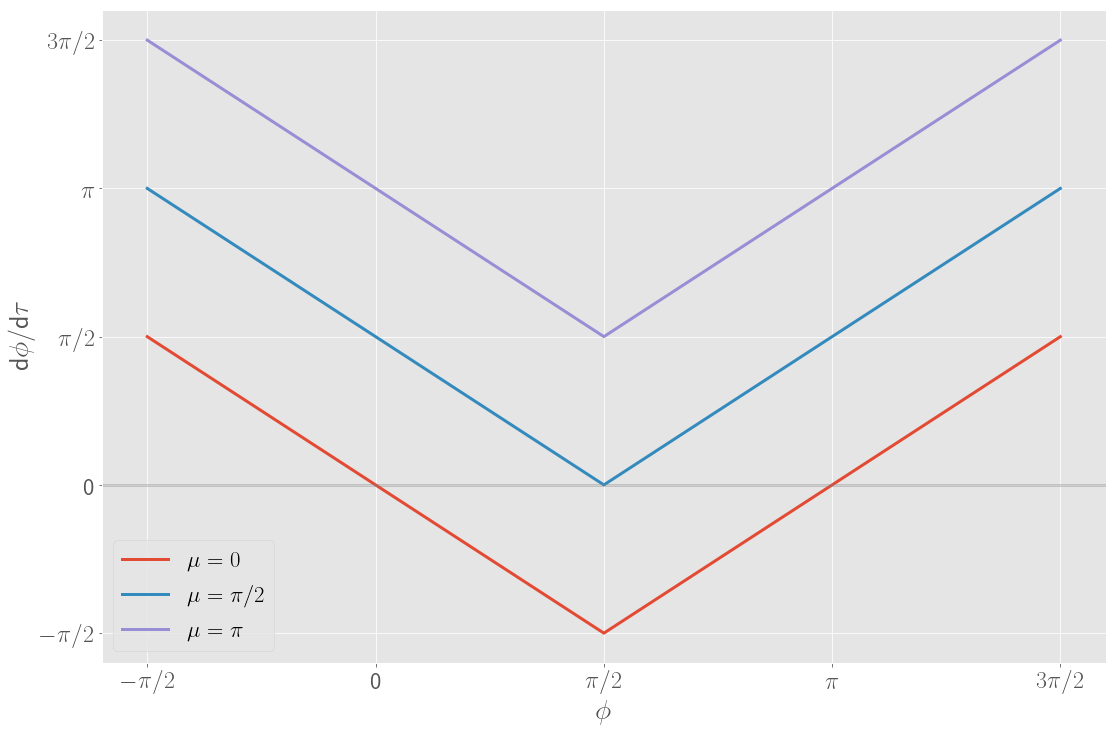

In [9]:
fig, ax = plt.subplots(1, figsize = (18, 12))

# Consider 1 period only
a = -np.pi/2; b = 3*np.pi/2
phi_vals = np.arange(a, b, 0.001)

# Mu value(s) to be studied
mu_values = [0, np.pi/2, np.pi]
labels_list = [r'$\mu = 0$', r'$\mu = \pi/2$', r'$\mu = \pi$']

for i in range(len(mu_values)):
    
    mu = mu_values[i]; label = labels_list[i]
    
    # Get y values for the plot
    y_vals = []
    for phi in phi_vals:    
        y_vals.append(phi_prime(phi, mu))

    # This allows us to plot ticks in terms of fractions of pi    
    y_vals2 = [val*radians for val in y_vals]
    phi_vals2 = [val*radians for val in phi_vals]

    # Plot
    ax.plot(phi_vals2, y_vals2, xunits = radians, yunits = radians, label = label)

# Make fancy, save and show
ax.legend(fontsize = 23)
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'd$\phi$/d$\tau$')
ax.axhline(y=0, color = 'grey', alpha = 0.35)
plt.savefig('phi_prime.pdf', bbox_inches = 'tight')
plt.show()

### 7.2.3 - Period of drifting solutions

Analytically, we determined the period to be given by:

In [10]:
def period(O = 3.3, o = 1.6, A = 1):
    '''O is capital Omega, o is omega. Default values ensure solution is drifting.'''
    return (2/A)*np.log(abs( (O - o + A*np.pi/2)/(O - o - A*np.pi/2) ))

For the default parameters (see the definition of the function), we have:

In [11]:
T = period()
print('The period should be equal to T = %0.4f' % T)

The period should be equal to T = 6.4628


In [12]:
def phi_dot(phi, O = 3.3, o = 1.6, A = 1):
    '''ODE for phi in original variables'''
    return O - o - A*general_triangle_wave(phi)

In [13]:
def solve_ODE(f, t_vals, x0, O = 3.3, o = 1.6, A = 1):
    '''Solve an ODE by discretising time, assuming y values are periodic with period 2pi.'''
    
    # Create empty list to save calculated values
    y_vals = []
    
    # Get the value of Delta t for calculations
    DeltaT = abs(t_vals[1] - t_vals[0])
    
    for t in t_vals:
        if t == t_vals[0]:
            # Initial condition
            y_vals.append(x0%(2*np.pi))
            
        else:
            # Compute next value: discretised derivative
            val = y_vals[-1] + f(y_vals[-1], O, o, A)*DeltaT
            y_vals.append(val%(2*np.pi))
            
    return y_vals

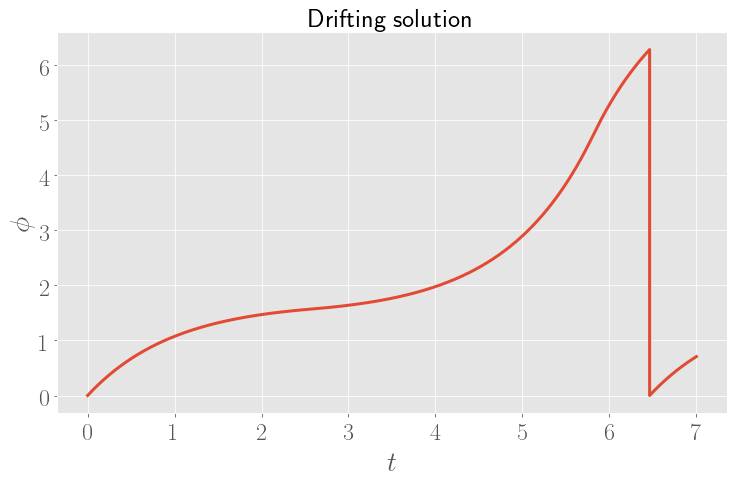

In [14]:
# Get phi values for approximately 1 period
t_vals = np.arange(0, 7, 0.0001)
y_vals = solve_ODE(phi_dot, t_vals, 0)

plt.figure(figsize = (12, 7))
plt.plot(t_vals, y_vals)

# Make fancy, save and show
plt.xlabel(r'$t$')
plt.ylabel(r'$\phi$')
plt.title('Drifting solution')
plt.savefig('drifting_solution.pdf', bbox_inches = 'tight')
plt.show()

Compare the period (as a function of $\Omega$) with the sine model

In [15]:
def period_sine_model(O, o = 1.6, A = 1):
    '''Period for the original Adler equation.'''
    return 2*np.pi/(np.sqrt((O - o)**2 - A**2))

Note: different range of entrainment so different starting value!

C:\Users\thibe\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


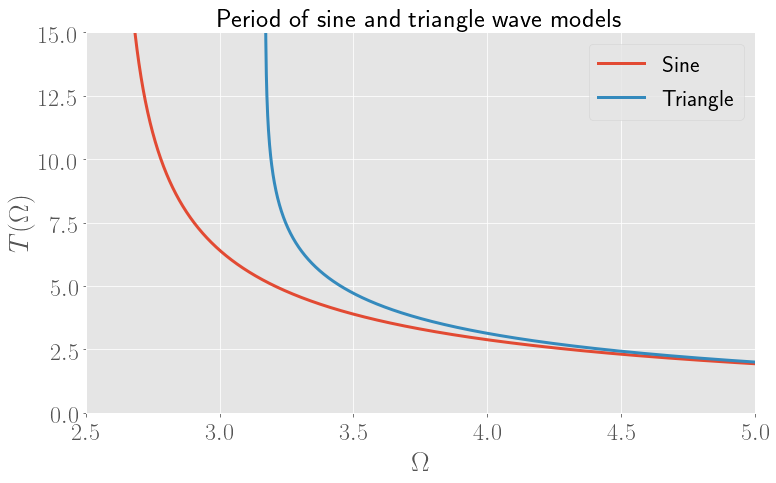

In [16]:
o = 1.6; A = 1

# Period for the sine model
O_values_sine = np.arange(o + A, 2*(o+A), 0.001)
y_vals_sine = period_sine_model(O_values_sine)

# Period for the triangle wave model
O_values_triangle = np.arange(o + A*np.pi/2, 2*(o+A), 0.001)
y_vals_triangle = period(O_values_triangle)

# Plot them
plt.figure(figsize = (12, 7))
plt.plot(O_values_sine, y_vals_sine, label = 'Sine')
plt.plot(O_values_triangle, y_vals_triangle, label = 'Triangle')

# Make fancy, save and show
plt.legend(fontsize = 23)
plt.ylim(0, 15)
plt.xlim(2.5, 5)
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$T(\Omega)$')
plt.title('Period of sine and triangle wave models')
plt.savefig('periods.pdf', bbox_inches = 'tight')
plt.show()